In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
frame=fetch_california_housing(as_frame=True)
df=frame.frame

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.shape

(20640, 9)

In [5]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
from scipy.stats import iqr

In [8]:
df[df['AveRooms']>((iqr(df['AveRooms'])*1.5)+df['AveRooms'].quantile(0.75))].shape

(466, 9)

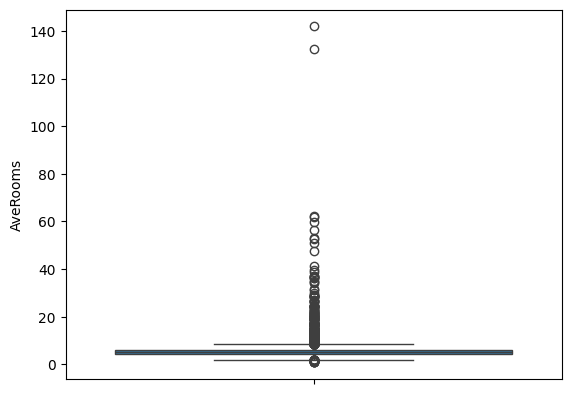

In [9]:
sns.boxplot(df['AveRooms'])
plt.show()

In [10]:
df.drop(columns=['Latitude','Longitude']).describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [79]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal', 'Val_Category'],
      dtype='object')

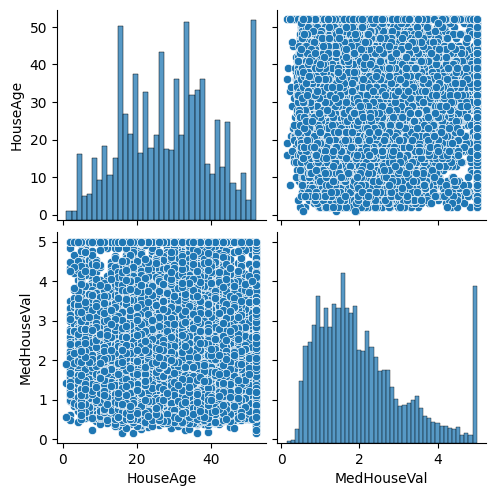

In [22]:
sns.pairplot(df[['HouseAge','MedHouseVal']])
plt.show()

In [23]:
df[['HouseAge','MedHouseVal']].corr()

,HouseAge,MedHouseVal
HouseAge,1.000000,0.105623
MedHouseVal,0.105623,1.000000


In [12]:
print(frame.target[:10])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
7    2.414
8    2.267
9    2.611
Name: MedHouseVal, dtype: float64


In [14]:
df['MedInc'].std()

1.8998217179452688

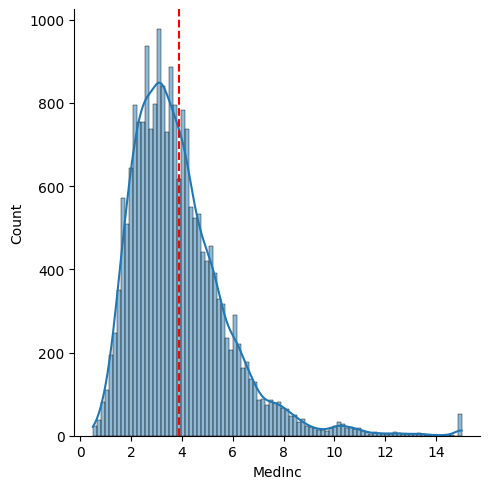

In [21]:
sns.displot(df['MedInc'],kde=True)
plt.axvline(df['MedInc'].mean(),color='red',linestyle='--')
plt.show()

In [22]:
df[['MedHouseVal']].describe().T

,count,mean,std,min,25%,50%,75%,max
MedHouseVal,20640.0,2.068558,1.153956,0.14999,1.196,1.797,2.64725,5.00001


In [25]:
np.linspace(1,5,5)

array([1., 2., 3., 4., 5.])

In [29]:
df[df['Val_Category'].isna()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal,Val_Category


In [27]:
bins=np.linspace(0.14998,df['MedHouseVal'].max(),6)

In [28]:
df['Val_Category']=pd.cut(df['MedHouseVal'],bins=bins,labels=[0,1,2,3,4])

In [18]:
df.drop(columns=['Latitude','Longitude'],inplace=True,)

In [30]:
df[df['MedHouseVal']==df['MedHouseVal'].min()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal,Val_Category
2521,1.6607,16.0,6.710526,1.921053,85.0,2.236842,0.14999,0
2799,2.1000,19.0,3.774390,1.457317,490.0,2.987805,0.14999,0
9188,4.1932,52.0,3.568889,1.186667,628.0,2.791111,0.14999,0
19802,0.5360,36.0,12.250000,3.500000,18.0,2.250000,0.14999,0


In [20]:
df.sample(n=10,random_state=1111)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal,Val_Category
11272,3.9798,31.0,5.017762,0.969805,1908.0,3.388988,1.87500,1
9930,5.3351,14.0,7.714597,1.087146,1577.0,3.435730,2.69900,2
18327,10.9508,52.0,6.961390,0.992278,683.0,2.637066,5.00001,4
3377,2.4727,19.0,3.772296,1.127135,1399.0,2.654649,1.75000,1
15629,7.7852,12.0,4.038922,1.044910,536.0,1.604790,2.50000,2
8636,7.9614,43.0,5.702517,1.027460,1033.0,2.363844,5.00001,4
14148,3.6125,36.0,4.969957,0.935622,619.0,2.656652,1.22500,1
5774,3.1397,52.0,4.636872,1.022346,479.0,2.675978,2.53700,2
1834,3.6321,40.0,4.865874,1.047538,1305.0,2.215620,2.09100,2
7000,3.3214,42.0,4.454829,1.052960,1269.0,3.953271,1.48800,1


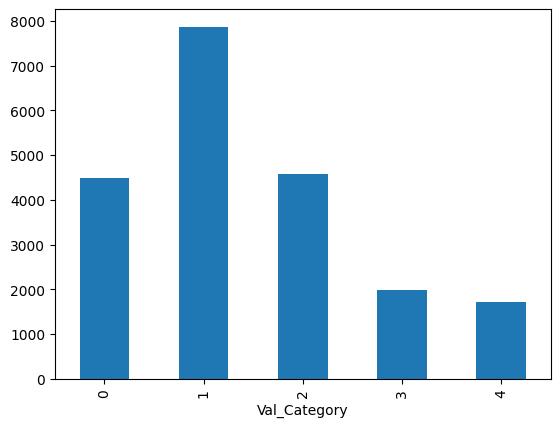

In [13]:
df.groupby(by="Val_Category",observed=True,).agg("count")['MedHouseVal'].plot(kind='bar')
plt.show()

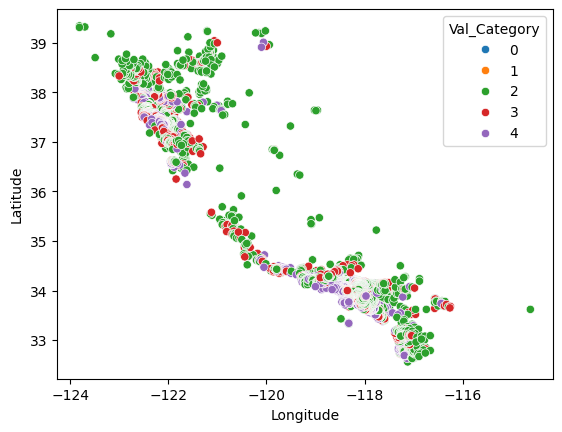

In [38]:
sns.scatterplot(x='Longitude',y='Latitude',data=df[df['Val_Category']>1]
                ,hue='Val_Category',legend=True,)
plt.show()

In [39]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Val_Category
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3


In [14]:
def drop_outliers(dataframe:pd.DataFrame,col:str):
    IQR=iqr(dataframe[col])
    upper_bound=(1.5*IQR)+dataframe[col].quantile(0.75)
    lower_bound=dataframe[col].quantile(0.25)-(1.5*IQR)
    print(f"Upper bound: {upper_bound}\nLower Bound: {lower_bound}")
    result=dataframe[(dataframe[col]>=lower_bound)&(dataframe[col]<=upper_bound)][col]
    return result

In [58]:
test=drop_outliers(df,col='AveRooms')

Upper bound: 8.469878027106942
Lower Bound: 2.023219161170969


In [54]:
df[df['AveRooms']>=8.47]['AveRooms']

155      8.972868
511      8.928358
512      9.210227
514      9.122715
517      9.000000
           ...   
20408    8.730038
20426    9.890756
20428    8.715842
20436    9.873315
20462    8.652174
Name: AveRooms, Length: 466, dtype: float64

In [66]:
len(drop_outliers(df,'AveBedrms'))

Upper bound: 1.2396965968190603
Lower Bound: 0.8659085155701288


19216

In [67]:
len(drop_outliers(df,'Population'))

Upper bound: 3132.0
Lower Bound: -620.0


19444

In [68]:
len(drop_outliers(df,'AveOccup'))

Upper bound: 4.5610405893536905
Lower Bound: 1.1509614824735064


19929

In [15]:
drop_outliers?

Signature: drop_outliers(dataframe: pandas.core.frame.DataFrame, col: str)
Docstring: <no docstring>
File:      c:\users\prishtina\appdata\local\temp\ipykernel_11808\1162400424.py
Type:      function

In [70]:
test_df=frame.frame

In [71]:
df['AveOccup']=drop_outliers(test_df,'AveOccup')

Upper bound: 4.5610405893536905
Lower Bound: 1.1509614824735064


In [76]:
test_df[test_df['AveOccup'].isna()].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Val_Category
89,1.2434,52.0,2.929412,0.917647,396.0,NaN,37.80,-122.27,5.00001,4
91,0.8668,52.0,2.443182,0.988636,904.0,NaN,37.80,-122.28,1.37500,1
92,0.7500,52.0,2.823529,0.911765,191.0,NaN,37.80,-122.28,1.62500,1
200,3.0257,52.0,4.046948,1.009390,994.0,NaN,37.78,-122.23,0.80800,0
270,3.8750,33.0,3.021277,0.659574,575.0,NaN,37.78,-122.18,2.25000,2


In [77]:
df.loc[89,'AveOccup']

nan

In [78]:
df.isna().sum()

MedInc            0
HouseAge          0
AveRooms          0
AveBedrms         0
Population        0
AveOccup        711
Latitude          0
Longitude         0
MedHouseVal       0
Val_Category      4
dtype: int64

In [80]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Val_Category
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3


In [81]:
df['pop/room']=df['Population']/df["AveRooms"]

In [82]:
df[['pop/room']].describe().T

,count,mean,std,min,25%,50%,75%,max
pop/room,20640.0,287.891497,247.142816,0.211403,144.413212,225.247093,352.472754,6770.139566


In [34]:
df[['AveBedrms','AveRooms','AveOccup','Population','MedHouseVal']].corr()['MedHouseVal']

AveBedrms     -0.046701
AveRooms       0.151948
AveOccup      -0.023737
Population    -0.024650
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

In [35]:
cols=['AveRooms','AveBedrms','Population','AveOccup']

In [33]:
df.drop(columns=['Val_Category']).describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [36]:
for i in ['AveRooms', 'AveBedrms', 'AveOccup']:
    df[i]=drop_outliers(dataframe=df,col=i)

Upper bound: 8.469878027106942
Lower Bound: 2.023219161170969
Upper bound: 1.2396965968190603
Lower Bound: 0.8659085155701288
Upper bound: 4.5610405893536905
Lower Bound: 1.1509614824735064


In [108]:
df.drop('pop/room',axis=1,inplace=True,)

In [101]:
df['AveOccup']=drop_outliers(df,'AveOccup')

Upper bound: 4.5610405893536905
Lower Bound: 1.1509614824735064


In [37]:
df.isna().sum()

MedInc             0
HouseAge           0
AveRooms         511
AveBedrms       1424
Population         0
AveOccup         711
MedHouseVal        0
Val_Category       0
dtype: int64

In [38]:
df.dropna(inplace=True)

In [39]:
df.isna().sum()

MedInc          0
HouseAge        0
AveRooms        0
AveBedrms       0
Population      0
AveOccup        0
MedHouseVal     0
Val_Category    0
dtype: int64

In [40]:
df.shape

(18405, 8)

In [109]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Val_Category
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3


In [68]:
X=df.drop(columns=['MedHouseVal','Val_Category','AveBedrms', 'Population'])
y=df['MedHouseVal']

In [69]:
y_cat=df['Val_Category']

In [45]:
from sklearn.neighbors import KNeighborsRegressor

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

In [58]:
from sklearn.metrics import accuracy_score,root_mean_squared_error,r2_score

In [53]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [64]:
from sklearn.tree import plot_tree

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.239,random_state=44)
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(X,y_cat,test_size=0.239,random_state=1111)

In [49]:
X_train.shape

(14006, 6)

In [50]:
len(y_test)

4399

In [71]:
scaler=StandardScaler()

In [72]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [75]:
X_train[0]

array([ 1.88698341,  0.71930392,  1.74166849, -0.11221969])

In [79]:
y_train[100]

2.578

In [80]:
bins

array([0.14998 , 1.119986, 2.089992, 3.059998, 4.030004, 5.00001 ])

In [81]:
y_train_2[100]

2

In [55]:
df[['Val_Category']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 18405 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Val_Category  18405 non-null  category
dtypes: category(1)
memory usage: 162.0 KB


In [56]:
y_train[:10]

6378     4.10400
7933     2.28200
15404    1.96000
9337     2.75200
5529     3.56000
8261     3.10000
18324    4.46600
6711     5.00001
15392    2.50000
12419    0.58800
Name: MedHouseVal, dtype: float64

In [82]:
tree=DecisionTreeRegressor(max_depth=7,)
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [83]:
print(r2_score(y_train,tree.predict(X_train)))

0.6865933622415195


In [84]:
print(r2_score(y_test,tree.predict(X_test)))

0.6520660675661827


In [67]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'MedHouseVal', 'Val_Category'],
      dtype='object')

In [65]:
tree.a


array([0.71053213, 0.05886598, 0.05013999, 0.00893492, 0.01196126,
       0.15956572])

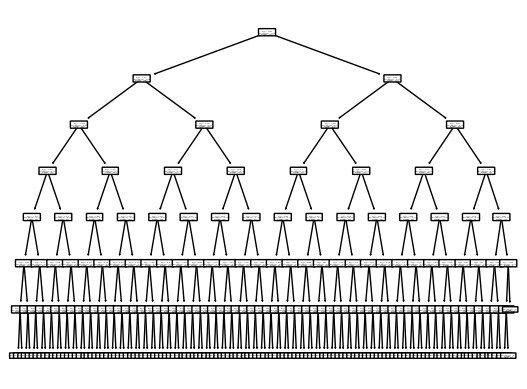

In [86]:
plot_tree(decision_tree=tree,rounded=True,max_depth=7)
plt.show()

In [87]:
pred_result=[]
for i in range(5,14):
    model=DecisionTreeRegressor(max_depth=i)
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    pred_result.append(r2_score(y_test,model.predict(X_test)))

In [91]:
pred_result[1]

0.6551122534333305

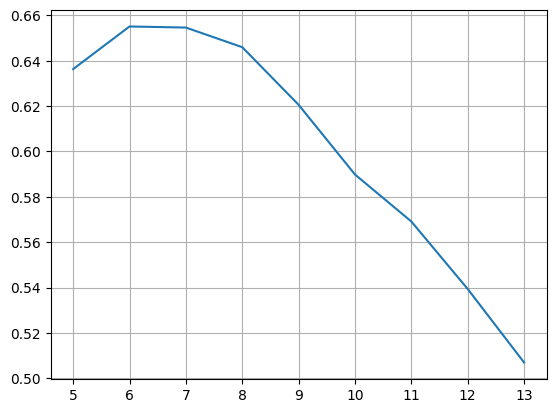

In [88]:
plt.plot(range(5,14),pred_result)
plt.grid()
plt.show()

In [93]:
knn=KNeighborsRegressor()

In [94]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [95]:
preds=knn.predict(X_test)

In [96]:
print(r2_score(y_test,preds))

0.6553387757656679


In [97]:
preds[0]

1.1764

In [98]:
scores=[]
for i in range(3,10):
    model=KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    print(f"Neigh: {i}, score: {np.round(score,2)}")
    scores.append(score)

Neigh: 3, score: 0.62
Neigh: 4, score: 0.64
Neigh: 5, score: 0.66
Neigh: 6, score: 0.66
Neigh: 7, score: 0.67
Neigh: 8, score: 0.67
Neigh: 9, score: 0.67


In [138]:
print(knn.score(X_test,y_test))

0.1769670308656479


In [141]:
from sklearn.tree import DecisionTreeRegressor

In [143]:
tree=DecisionTreeRegressor(max_depth=7)

In [144]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [145]:
print(tree.score(X_test,y_test))

0.6523461489959195


In [146]:
scores=[]
for i in range(3,14):
    model=DecisionTreeRegressor(max_depth=i)
    model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    print(f"Neigh: {i}, score: {np.round(score,2)}")
    scores.append(score)

Neigh: 3, score: 0.55
Neigh: 4, score: 0.6
Neigh: 5, score: 0.64
Neigh: 6, score: 0.65
Neigh: 7, score: 0.65
Neigh: 8, score: 0.64
Neigh: 9, score: 0.61
Neigh: 10, score: 0.59
Neigh: 11, score: 0.57
Neigh: 12, score: 0.55
Neigh: 13, score: 0.5


In [147]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
forest=RandomForestRegressor(max_depth=7)
forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=7)

In [101]:
print(r2_score(y_test,forest.predict(X_test)))

0.6965917284613103


In [111]:
from sklearn.linear_model import Lasso,Ridge

In [112]:
ridge=Ridge()

In [103]:
lasso=Lasso()

In [113]:
ridge.fit(X_train,y_train)

Ridge()

In [114]:
ridge.coef_

array([ 0.99046339,  0.19977979, -0.28558385, -0.26623086])

In [117]:
ridge.intercept_

2.092303636298729

In [118]:
print(r2_score(y_test,ridge.predict(X_test)))

0.6194111053285811


## Classifier

In [119]:
X_train_scaled=scaler.fit_transform(X_train_2)
X_test_scaled=scaler.transform(X_test_2)

In [120]:
tree_class=DecisionTreeClassifier(max_depth=7)
tree_class.fit(X_train_scaled,y_train_2)

DecisionTreeClassifier(max_depth=7)

In [121]:
print(accuracy_score(y_test_2,tree_class.predict(X_test_scaled)))

0.5669470334166856


In [123]:
X_train_2.iloc[1,:]

MedInc       2.460000
HouseAge    14.000000
AveRooms     6.205575
AveOccup     2.557491
Name: 18816, dtype: float64

In [124]:
ens=RandomForestClassifier()
ens.fit(X_train_scaled,y_train_2)

RandomForestClassifier()

In [129]:
ens.predict_proba([X_test_scaled[100]])

array([[0.  , 0.65, 0.32, 0.02, 0.01]])

In [131]:
print(accuracy_score(y_test_2,ens.predict(X_test_scaled)))

0.5776312798363265


In [132]:
from sklearn.svm import SVC,SVR

In [ ]:
svr=SVR(kernel='poly',gamma=1000)
svr.fit(X_train_scaled,y_train_2)

In [ ]:
print(accuracy_score(y_test_2,svr.predict(X_test_scaled)))